OUAEL Ettouileb
M1 - SEP
#  Crawler Boursorma



In [ ]:
from bs4 import BeautifulSoup
import requests
import time
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Création du Crawler

In [ ]:
#Création d'une fonction qui permet d'obtenir le numero de la page et le numéro de ligne où se trouve une entreprise sur le site de Boursourama
def get_company_num(company):
  for num_page in range(1,11) :
    source = requests.get('https://www.boursorama.com/bourse/actions/cotations/page-'+ str(num_page)).text 
    soup = BeautifulSoup(source, 'lxml')
    table = soup.find("table", class_ = "c-table c-table--generic c-table--generic c-shadow-overflow__table-fixed-column c-table-top-flop")
    rows  = table.find_all("tr")
    for num_row in range(1,len(rows)):
      text_ = rows[num_row].find_all("a")[0].text.split("<")
      if text_[0] == company:
        return {"Numero de page":num_page, "Numero de ligne" : num_row} 

In [ ]:
get_company_num("AIRBUS")

{'Numero de ligne': 10, 'Numero de page': 1}

In [ ]:
# Creation d'une fonction pour scraper la valeur boursière d'une entreprise cac40
# La fonction a pour paramètres : le nom de l'entreprise (en Majuscules), l'intervale du temps pour chaque itération et nom du fichier de sortie et le nom du fichier CSV de sorite
def get_data(company_,freq,data):

  #Creation d'objets nécéssaires pour le stockage des différentes colonnes scrapées afin de constuire notre data frame final:
  columns = ["ENTREPRISE","DERNIER","VAR","OUV","HAUT","BAS","VAR1JANV","VOL","DATE"]
  col_num = ["DERNIER","OUV","HAUT","BAS","VAR1JANV","VOL"] # J'ai supprimé var
  new_row = {"ENTREPRISE" : [], "DERNIER" : [], "VAR" :  [], "OUV" : [],"HAUT" : [],
              "BAS" : [], "VAR1JANV" : [], "VOL" : [],"DATE" : []  }
  df = pd.DataFrame(new_row)

  # Affectation du numéro de page et numéro de ligne de l'entreprise respectivement dans les variables num_page et num_row
  num_page = get_company_num(company_)["Numero de page"]
  num_row = get_company_num(company_)["Numero de ligne"]  


  # Crawling 
  try :      
      while True :
        source = requests.get('https://www.boursorama.com/bourse/actions/cotations/page-'+str(num_page)).text 
        soup = BeautifulSoup(source, 'lxml')
        table = soup.find("table", class_ = "c-table c-table--generic c-table--generic c-shadow-overflow__table-fixed-column c-table-top-flop")
        rows  = table.find_all("tr")

        # Affecter chaque valeur de la ligne collectée à son clé correspendant dans le dictionnaire new_row (Nouvelle valeur à chaque itération)
        new_row["ENTREPRISE"] = rows[num_row].find_all("td")[0].text
        new_row["DERNIER"] = rows[num_row].find_all("td")[1].text
        new_row["VAR"] = rows[num_row].find_all("td")[2].text
        new_row["OUV"] = rows[num_row].find_all("td")[3].text
        new_row["HAUT"] = rows[num_row].find_all("td")[4].text
        new_row["BAS"] = rows[num_row].find_all("td")[5].text
        new_row["VAR1JANV"] = rows[num_row].find_all("td")[6].text
        new_row["VOL"] = rows[num_row].find_all("td")[7].text
        new_row["DATE"] = time.strftime("%Y-%m-%d %H:%M:%S") # Affecter à la clé "date" du dictionnaire new_row le temps du scapring de la nouvelle ligne
        
        # Ajouter cette nouvelle ligne enregistrée dans le dictionnaire new_row au DataFrame
        df = df.append(new_row, ignore_index= True) 
        
        time.sleep(freq) # Pour faire pause à l'itération pendant un intervalle de temps définis par la variable freq.
        
        
        
  except : 
      
# Nettoyage des données collectées 
      for i in range(0,len(df)):
       df.loc[i,"VAR1JANV"] = df.loc[i,"VAR1JANV"].split("\n")[-1].split("%")[0]
       df.loc[i,"DERNIER"] = df.loc[i,"DERNIER"].split(" (")[0]  
       df.loc[i,"VAR"] = df.loc[i,"VAR"].split("%")[0]

# Définition du type de chaque colonne
      for c in col_num :
        for i in range(0,len(df)):
          df.loc[i,c] = float(df.loc[i,c]) # Transformer les valeurs de chaque colonne col_num à des variables numériques de type FLOAT
          df[c] = pd.to_numeric(df[c]) # Transformer les colonnes col_num à des colonnes de type numérique
      for i in range(0, len(df)):
        df.loc[i, "VAR"] = float(df.loc[i, "VAR"])
      df["VAR"] = df["VAR"] / 100
      df["VAR1JANV"] = df["VAR1JANV"] / 100
      df.DATE = pd.to_datetime(df.DATE)
      df.set_index("DATE", inplace= True) # Mettre la colonne DATE en index
      df.to_csv(data) # Enregistrement du DataFrame final dans un fichier CSV
      
  return df




## Collecte des données

In [ ]:
df = get_data("CARMILA",1, "CARMILA.csv")


In [ ]:
df

,ENTREPRISE,DERNIER,VAR,OUV,HAUT,BAS,VAR1JANV,VOL
DATE,,,,,,,,
2020-11-30 16:24:28,CARMILA,11.9,-0.0372,12.26,12.26,11.8,-0.3505,59813.0
2020-11-30 16:24:31,CARMILA,11.9,-0.0372,12.26,12.26,11.8,-0.3505,59813.0
2020-11-30 16:24:32,CARMILA,11.9,-0.0372,12.26,12.26,11.8,-0.3505,59813.0
2020-11-30 16:24:35,CARMILA,11.9,-0.0372,12.26,12.26,11.8,-0.3505,59813.0
2020-11-30 16:24:37,CARMILA,11.9,-0.0372,12.26,12.26,11.8,-0.3505,59813.0
2020-11-30 16:24:39,CARMILA,11.9,-0.0372,12.26,12.26,11.8,-0.3505,59813.0
2020-11-30 16:24:41,CARMILA,11.9,-0.0372,12.26,12.26,11.8,-0.3505,59813.0
2020-11-30 16:24:43,CARMILA,11.9,-0.0372,12.26,12.26,11.8,-0.3505,59813.0
2020-11-30 16:24:46,CARMILA,11.9,-0.0372,12.26,12.26,11.8,-0.3505,59813.0


In [ ]:
df.set_index("DATE",inplace = True)
df.index = pd.to_datetime(df.index)

In [ ]:
df

,ENTREPRISE,DERNIER,VAR,OUV,HAUT,BAS,VAR1JANV,VOL
DATE,,,,,,,,
2020-11-16 12:19:11,CARMILA,11.66,0.1233,0.00,11.84,0.00,-0.3636,119123.0
2020-11-16 12:20:12,CARMILA,11.62,0.1195,0.00,11.84,0.00,-0.3658,120323.0
2020-11-16 12:21:12,CARMILA,11.62,0.1195,0.00,11.84,0.00,-0.3658,120323.0
2020-11-16 12:22:13,CARMILA,11.66,0.1233,0.00,11.84,0.00,-0.3636,123128.0
2020-11-16 12:23:13,CARMILA,11.64,0.1214,0.00,11.84,0.00,-0.3647,124946.0
...,...,...,...,...,...,...,...,...
2020-11-16 13:45:58,CARMILA,12.12,0.1676,10.56,12.18,10.56,-0.3385,166895.0
2020-11-16 13:46:58,CARMILA,12.12,0.1676,10.56,12.18,10.56,-0.3385,166895.0
2020-11-16 13:47:59,CARMILA,12.12,0.1676,10.56,12.18,10.56,-0.3385,166895.0


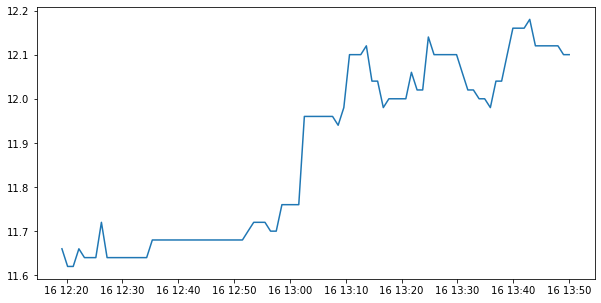

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df.DERNIER)